In [1]:
import matplotlib.pyplot as plt
import numpy as np
from fvhoe.hydro import compute_conservatives
from fvhoe.initial_conditions import square
from fvhoe.solver import EulerSolver

In [2]:
def f0(x, y, z):
    return square(x, y, z, dims="xy", vx=2, vy=1)

In [3]:
solver = EulerSolver(
    w0=f0, nx=64, ny=64, px=3, py=3, riemann_solver="advection_upwind", cupy=True
)

In [4]:
solver.rkorder(1, downbeats=[0.5])

100%|██████████| 1.0/1 [00:17]                 


t=1.00, x=[0.01, 0.99], y=[0.01, 0.99], z=0.50
horizontal_axis='x', vertical_axis='y'


Text(0, 0.5, '$y$')

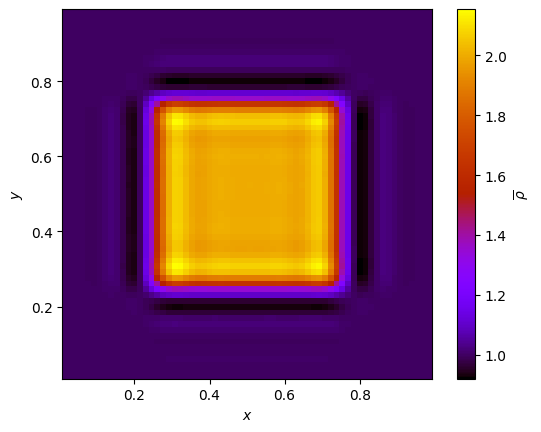

In [5]:
fig, ax = plt.subplots()

param = "rho"
im = solver.plot_2d_slice(ax, t=1, param=param, cmap="gnuplot", z=0.5)
fig.colorbar(im, ax=ax, label=r"$\overline{\rho}$")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

In [6]:
for t in [0, 1]:
    m_tot = np.sum(solver.snapshots[0]["rho"][:, 0, 0]) * (
        solver.h[0] * solver.h[1] * solver.h[2]
    )
    print(f"Total mass at time {t}: {m_tot}")

Total mass at time 0: 0.015625
Total mass at time 1: 0.015625
